In [2]:
!python -V

Python 3.10.0


## Necessary Dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading and Exploring the Dataset Information

df = pd.read_csv('data/student_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.shape

(1000, 8)

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# Exploring the categories in the dataset
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique())

print("Categories 'race_ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique())

print("Categories 'parental_level_of_education' variable: ", end="")
print(df['parental_level_of_education'].unique)

print("Categories 'lunch' variable: ", end="")
print(df['lunch'].unique())

print("Categories 'test_preparation_course' variable: ", end = "")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories 'parental_level_of_education' variable: <bound method Series.unique of 0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object>
Categories 'lunch' variable: ['standard' 'free/reduced']
Categories 'test_preparation_course' variable: ['none' 'completed']


In [13]:
# Numerical and Categorical Features

numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
categorical_features = [feature for feature in df.columns if df[feature].dtype == '0']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\n We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 8 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

 We have 0 categorical features: []


In [15]:
# Calculating Total Score & Average Score

df['total_score'] =  df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
math_full = df[df['math_score']== 100]['average_score'].count()
reading_full = df[df['reading_score']== 100]['average_score'].count()
writing_full = df[df['writing_score']== 100]['average_score'].count()

print(f"Number of Students with full marks in Maths: {math_full}")
print(f"Number of Students with full marks in Reading: {reading_full}")
print(f"Number of Students with full marks in Writing: {writing_full}")

Number of Students with full marks in Maths: 7
Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14


In [ ]:
# Students That Score Below 20

math_full = df[df['math_score']<= 20]['average_score'].count()
reading_full = df[df['reading_score']<= 20]['average_score'].count()
writing_full = df[df['writing_score']<= 20]['average_score'].count()

print(f"Number of Students with full marks in Maths: {math_full}")
print(f"Number of Students with full marks in Reading: {reading_full}")
print(f"Number of Students with full marks in Writing: {writing_full}")

Number of Students with full marks in Maths: 4
Number of Students with full marks in Reading: 1
Number of Students with full marks in Writing: 3


## Visualizing the EDA

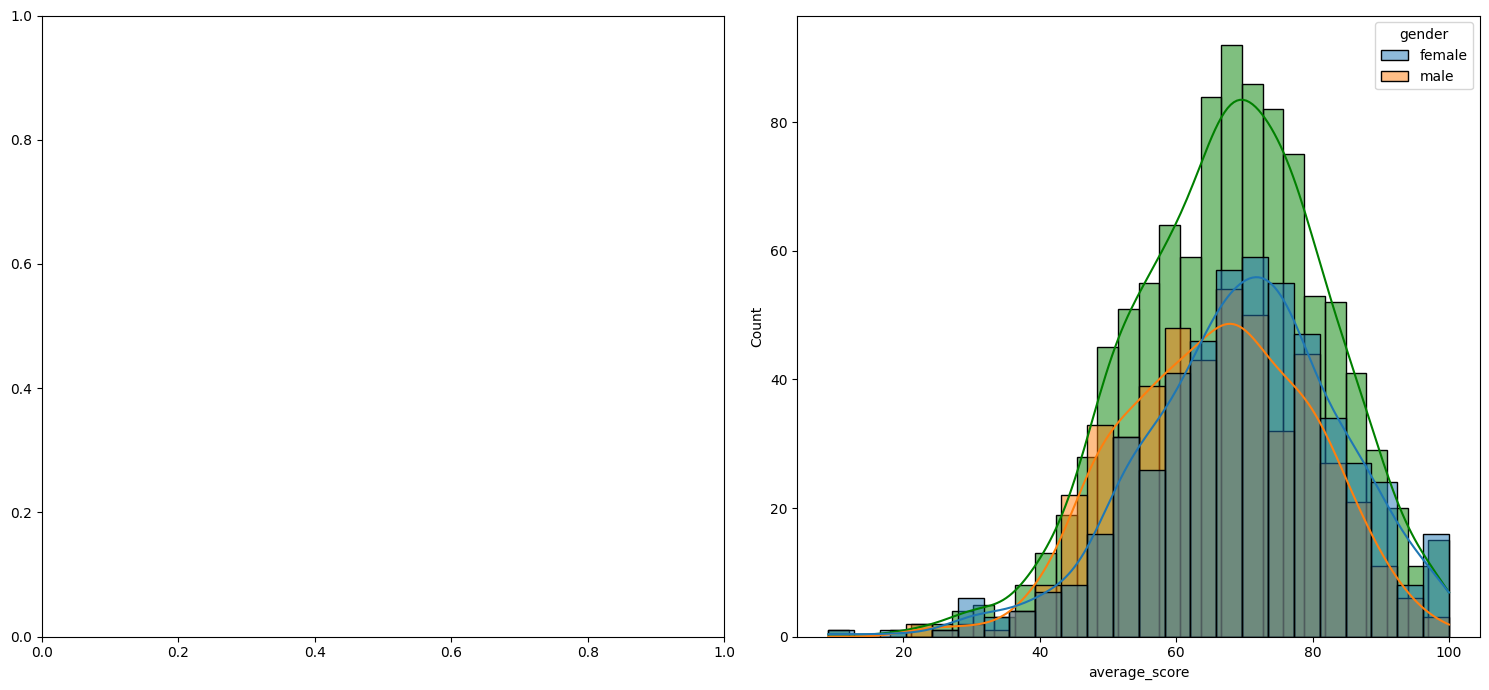

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')

sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.tight_layout()
plt.show()

Insights: Thus the Female students tends to perform better than the male students from the chart

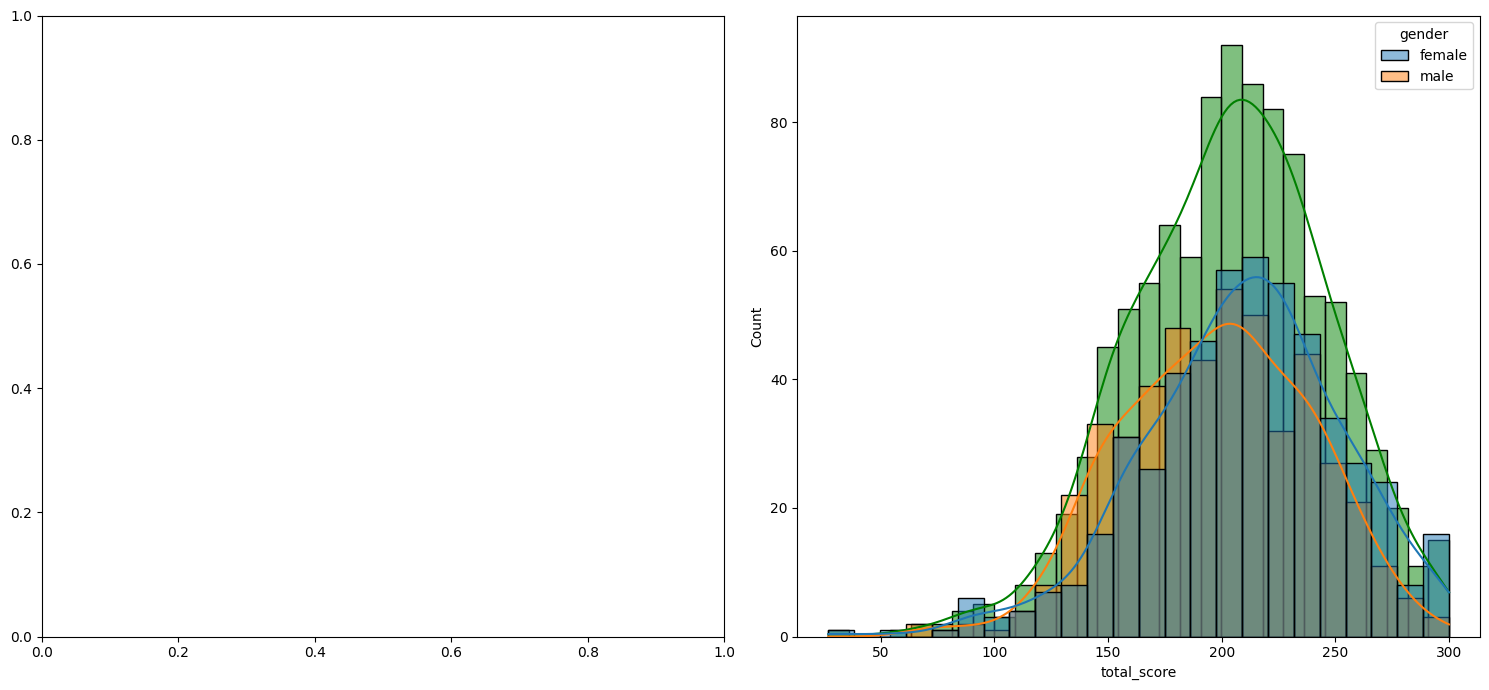

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.tight_layout()
plt.show()

Insights: Thus the Female students tends to perform better than the male students from the chart